In [20]:
!pip install scikit-learn seaborn pandas numpy matplotlib loguru

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Obtaining dependency information for loguru from https://files.pythonhosted.org/packages/03/0a/4f6fed21aa246c6b49b561ca55facacc2a44b87d65b8b92362a8e99ba202/loguru-0.7.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


▶ **Multi-layer Perceptron Classifier (MLPClassifier)** - MLP também pode ser usado para resolver problemas de classificação. Para este exemplo foi utilizado o conjunto de dados Iris com todas as classes possíveis, da plataforma “Kaggle” (https://www.kaggle.com/datasets/uciml/iris)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

▶ **Carregamento e Organização Inicial do Dataset**

In [4]:
train = pd.read_csv("bebidas.csv")
test = pd.read_csv("bebidasTestes.csv")

In [5]:
base = pd.concat([train, test])

In [7]:
base

,x1,x2,x3,x4,d1,d2,d3
0,0.3841,0.2021,0.0000,0.2438,1,0,0
1,0.1765,0.1613,0.3401,0.0843,1,0,0
2,0.3170,0.5786,0.3387,0.4192,0,1,0
3,0.2467,0.0337,0.2699,0.3454,1,0,0
4,0.6102,0.8192,0.4679,0.4762,0,1,0
...,...,...,...,...,...,...,...
13,0.9633,0.7850,0.6777,0.6059,0,0,1
14,0.7739,0.8505,0.7934,0.6626,0,0,1
15,0.4219,0.4136,0.1408,0.0940,1,0,0
16,0.6616,0.4365,0.6597,0.8129,0,0,1


In [8]:
tipoA = base.query("d1 == 1 & d2 == 0 & d3 == 0").copy()
tipoB = base.query("d1 == 0 & d2 == 1 & d3 == 0").copy()
tipoC = base.query("d1 == 0 & d2 == 0 & d3 == 1").copy()

In [9]:

# Função para determinar o target
def determine_target(row):
    if row['d1'] == 1 and row['d2'] == 0 and row['d3'] == 0:
        return 1
    elif row['d1'] == 0 and row['d2'] == 1 and row['d3'] == 0:
        return 2
    elif row['d1'] == 0 and row['d2'] == 0 and row['d3'] == 1:
        return 3
    else:
        return 4

# Aplicando a função ao DataFrame
base['target'] = base.apply(determine_target, axis=1)


In [10]:
feature = base[['x1', 'x2', 'x3', 'x4']].copy()
target = base[['target']].copy()


▶ **Mapa de correlação entre as variáveis do dataset**

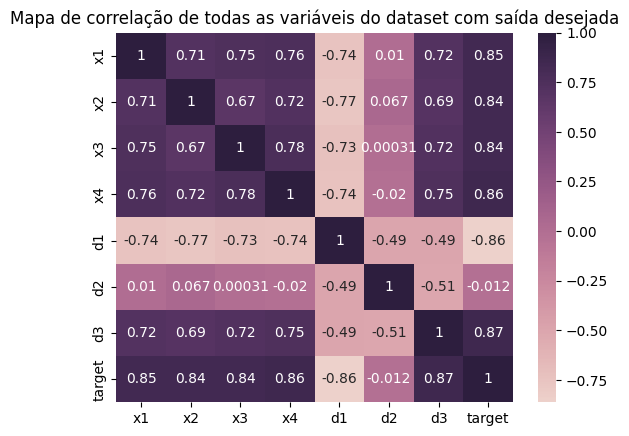

In [11]:
ax = sns.heatmap(base.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Mapa de correlação de todas as variáveis do dataset com saída desejada')
ax=ax

▶ **Pré-Processamento dos Dados**

In [12]:
Xcv = feature.copy()
scaler = MinMaxScaler().fit(feature)
X = scaler.transform(feature)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30)

▶ **Aplicação do MLPClassifier** (
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

#### Training With 5, 10 and 15 Layers

In [26]:
from loguru import logger
from sklearn.neural_network import MLPClassifier

def train_mlp(hidden_layer_size, X_train, y_train, learning_rate_init=0.001, max_iter=5000, epsilon=1e-6):
    logger.info(f"Configurando o modelo com {hidden_layer_size} neurônios, taxa de aprendizado {learning_rate_init}, máximo de iterações {max_iter}, e tolerância {epsilon}.")
    

    mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), 
                        activation='logistic', 
                        learning_rate_init=learning_rate_init, 
                        max_iter=max_iter, 
                        tol=epsilon, 
                        random_state=42)
    
    mlp.fit(X_train, y_train)
    logger.info(f"Modelo com {hidden_layer_size} neurônios treinado com sucesso.")
    
    return mlp

mlp_5 = train_mlp(5, X_train, y_train)
mlp_10 = train_mlp(10, X_train, y_train)
mlp_15 = train_mlp(15, X_train, y_train)


2024-06-03 12:49:01.576 | INFO     | __main__:train_mlp:5 - Configurando o modelo com 5 neurônios, taxa de aprendizado 0.001, máximo de iterações 5000, e tolerância 1e-06.
/home/juannascimento/Modelos/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juannascimento/Modelos/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
2024-06-03 12:49:02.474 | INFO     | __main__:train_mlp:17 - Modelo com 5 neurônios treinado com sucesso.
2024-06-03 12:49:02.475 | INFO     | __main__:train_mlp:5 - Configurando o modelo com 10 neurônios, taxa de aprendizado 0.001, máximo de iterações 5000, e tolerânci

2024-06-03 13:03:40.097 | INFO     | __main__:evaluate_and_plot:8 - Configuração com 5 neurônios - Acurácia: 95.56%


2024-06-03 13:03:40.185 | INFO     | __main__:evaluate_and_plot:18 - Gráfico de perda salvo como loss_curve_5_neurons.png


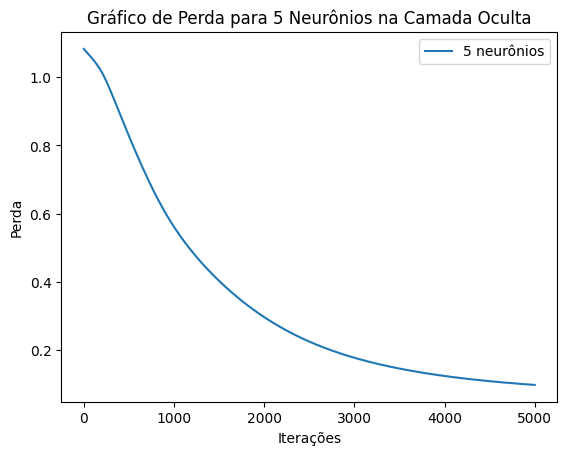

2024-06-03 13:03:40.274 | INFO     | __main__:evaluate_and_plot:8 - Configuração com 10 neurônios - Acurácia: 95.56%
2024-06-03 13:03:40.350 | INFO     | __main__:evaluate_and_plot:18 - Gráfico de perda salvo como loss_curve_10_neurons.png


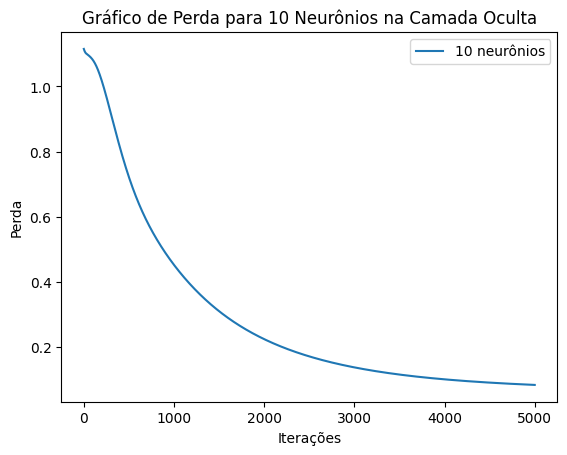

2024-06-03 13:03:40.430 | INFO     | __main__:evaluate_and_plot:8 - Configuração com 15 neurônios - Acurácia: 95.56%
2024-06-03 13:03:40.514 | INFO     | __main__:evaluate_and_plot:18 - Gráfico de perda salvo como loss_curve_15_neurons.png


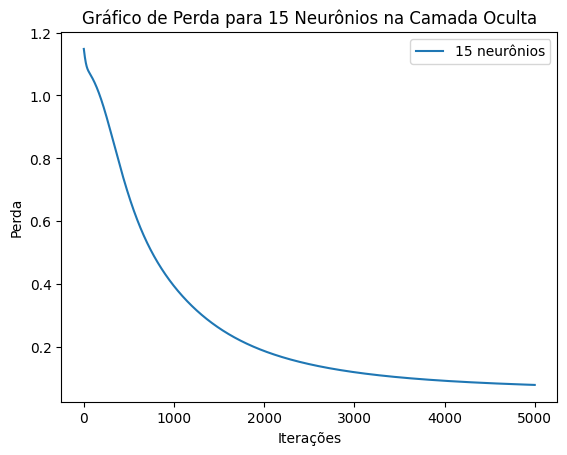

In [36]:
from loguru import logger
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def evaluate_and_plot(model, X_test, y_test, hidden_layer_size):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    logger.info(f'Configuração com {hidden_layer_size} neurônios - Acurácia: {accuracy * 100:.2f}%')

    plt.plot(model.loss_curve_, label=f'{hidden_layer_size} neurônios')
    plt.title(f'Gráfico de Perda para {hidden_layer_size} Neurônios na Camada Oculta')
    plt.xlabel('Iterações')
    plt.ylabel('Perda')
    plt.legend()
    
    plot_filename = f'loss_curve_{hidden_layer_size}_neurons.png'
    plt.savefig(plot_filename)
    logger.info(f'Gráfico de perda salvo como {plot_filename}')
    
    plt.show()

# Exemplo de uso da função:
evaluate_and_plot(mlp_5, X_test, y_test, 5)
evaluate_and_plot(mlp_10, X_test, y_test, 10)
evaluate_and_plot(mlp_15, X_test, y_test, 15)


▶ **Avaliação do Modelo considerando um percentual fixo de amostras para treinamentos e outro para validação**

2024-06-03 13:05:58.314 | INFO     | __main__:evaluate_model:10 - 
MÉTRICAS DA CLASSIFICAÇÃO
2024-06-03 13:05:58.319 | INFO     | __main__:evaluate_model:11 - Acurácia das amostras na classificação não apresentadas no treinamento: 0.9555555555555556
2024-06-03 13:05:58.326 | INFO     | __main__:evaluate_model:12 - Acurácia balanceada na classificação das amostras não apresentadas no treinamento: 0.9583333333333334
2024-06-03 13:05:58.331 | INFO     | __main__:evaluate_model:13 - Matriz de confusão das amostras não apresentadas no treinamento:
 [[13  0  0]
 [ 1 15  0]
 [ 0  1 15]]
2024-06-03 13:05:58.341 | INFO     | __main__:evaluate_model:16 - Relatório de classificação das amostras não apresentadas no treinamento:
2024-06-03 13:05:58.342 | INFO     | __main__:evaluate_model:17 - 
              precision    recall  f1-score   support

       tipoA       0.93      1.00      0.96        13
       tipoB       0.94      0.94      0.94        16
       tipoC       1.00      0.94      0.97 

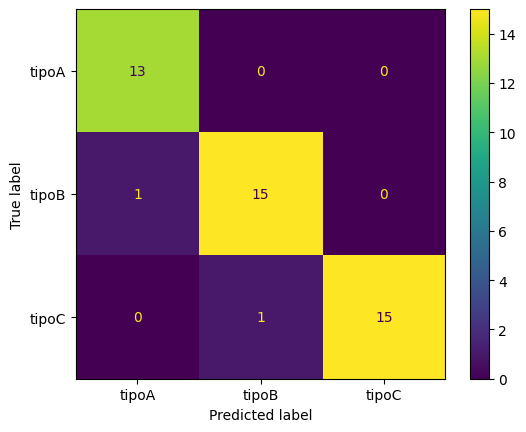

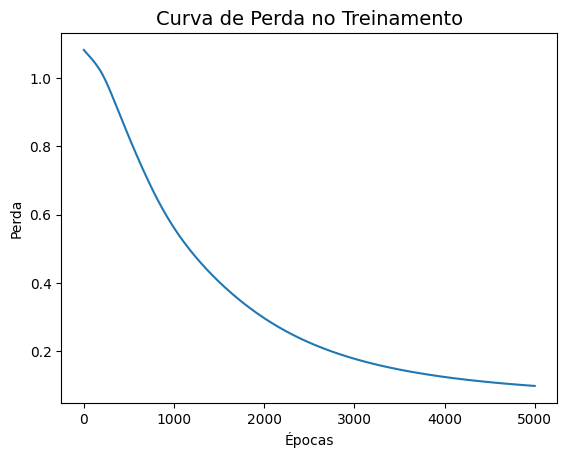

2024-06-03 13:05:58.531 | INFO     | __main__:evaluate_model:31 - 
MÉTRICAS DO TREINAMENTO
2024-06-03 13:05:58.532 | INFO     | __main__:evaluate_model:33 - Melhor loss do treinamento: 0.09834194950756614
2024-06-03 13:05:58.532 | INFO     | __main__:evaluate_model:34 - Último valor do loss para convergência: 0.09834194950756614
2024-06-03 13:05:58.534 | INFO     | __main__:evaluate_model:35 - Mean Absolute Error (MAE): 0.044444444444444446
2024-06-03 13:05:58.536 | INFO     | __main__:evaluate_model:36 - Mean Squared Error (MSE): 0.044444444444444446
/home/juannascimento/Modelos/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2024-06-03 13:05:58.537 | INFO     | __main__:evaluate_model:37 - Root Mean Squared Error (RMSE): 0.21081851067789195
2024-06-03 13:05:58.539 | INFO     | __mai

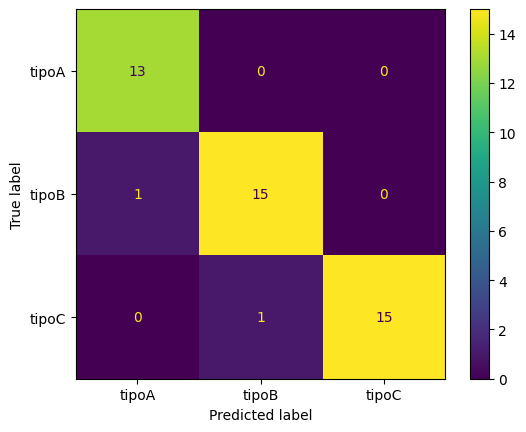

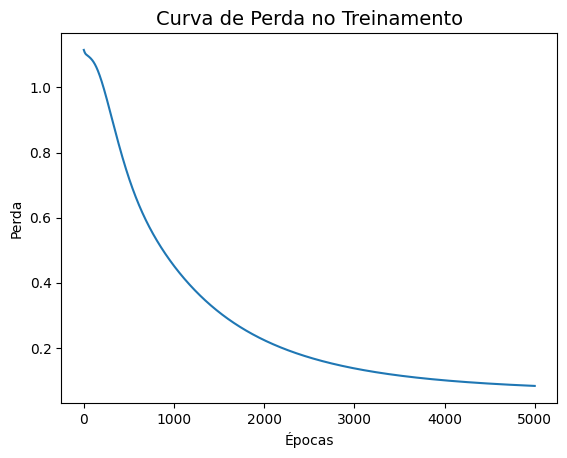

2024-06-03 13:05:58.743 | INFO     | __main__:evaluate_model:31 - 
MÉTRICAS DO TREINAMENTO
2024-06-03 13:05:58.744 | INFO     | __main__:evaluate_model:33 - Melhor loss do treinamento: 0.0830825821055602
2024-06-03 13:05:58.744 | INFO     | __main__:evaluate_model:34 - Último valor do loss para convergência: 0.0830825821055602
2024-06-03 13:05:58.746 | INFO     | __main__:evaluate_model:35 - Mean Absolute Error (MAE): 0.044444444444444446
2024-06-03 13:05:58.747 | INFO     | __main__:evaluate_model:36 - Mean Squared Error (MSE): 0.044444444444444446
/home/juannascimento/Modelos/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2024-06-03 13:05:58.748 | INFO     | __main__:evaluate_model:37 - Root Mean Squared Error (RMSE): 0.21081851067789195
2024-06-03 13:05:58.749 | INFO     | __main_

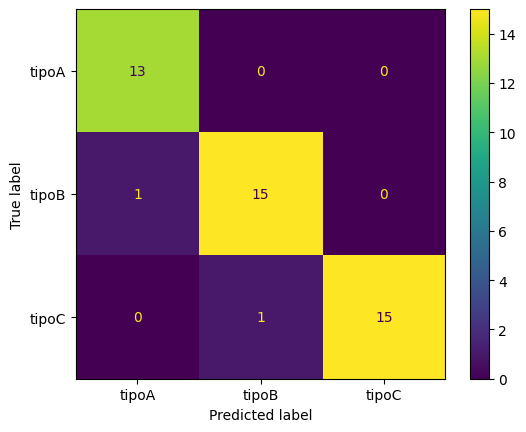

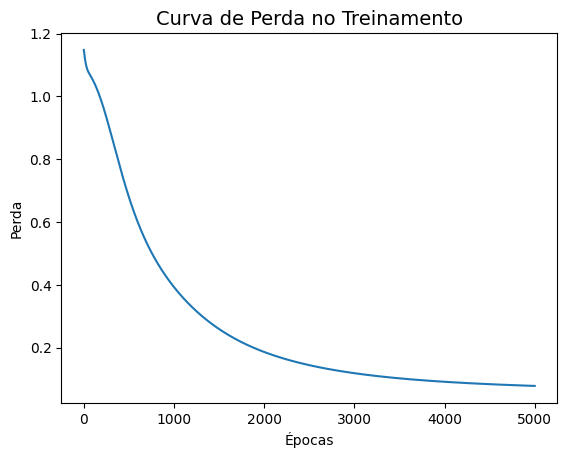

2024-06-03 13:05:59.069 | INFO     | __main__:evaluate_model:31 - 
MÉTRICAS DO TREINAMENTO
2024-06-03 13:05:59.070 | INFO     | __main__:evaluate_model:33 - Melhor loss do treinamento: 0.07854957189726301
2024-06-03 13:05:59.070 | INFO     | __main__:evaluate_model:34 - Último valor do loss para convergência: 0.07854957189726301
2024-06-03 13:05:59.072 | INFO     | __main__:evaluate_model:35 - Mean Absolute Error (MAE): 0.044444444444444446
2024-06-03 13:05:59.073 | INFO     | __main__:evaluate_model:36 - Mean Squared Error (MSE): 0.044444444444444446
/home/juannascimento/Modelos/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2024-06-03 13:05:59.074 | INFO     | __main__:evaluate_model:37 - Root Mean Squared Error (RMSE): 0.21081851067789195
2024-06-03 13:05:59.075 | INFO     | __mai

In [37]:
from loguru import logger
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, confusion_matrix, 
                             classification_report, ConfusionMatrixDisplay)
from sklearn import metrics

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    logger.info("\nMÉTRICAS DA CLASSIFICAÇÃO")
    logger.info(f"Acurácia das amostras na classificação não apresentadas no treinamento: {accuracy_score(y_test, y_pred)}")
    logger.info(f"Acurácia balanceada na classificação das amostras não apresentadas no treinamento: {balanced_accuracy_score(y_test, y_pred)}")
    logger.info(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")

    relatorio = classification_report(y_test, y_pred, target_names=["tipoA", "tipoB", "tipoC"])
    logger.info("Relatório de classificação das amostras não apresentadas no treinamento:")
    logger.info(f"\n{relatorio}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["tipoA", "tipoB", "tipoC"])
    cm_display.plot()
    plt.show()

    # Plotando o gráfico de erros no processo de treinamento
    plt.plot(model.loss_curve_)
    plt.title("Curva de Perda no Treinamento", fontsize=14)
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.show()

    logger.info("\nMÉTRICAS DO TREINAMENTO")
    
    logger.info(f"Melhor loss do treinamento: {model.best_loss_}")
    logger.info(f"Último valor do loss para convergência: {model.loss_}")  
    logger.info(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, y_pred)}") 
    logger.info(f"Mean Squared Error (MSE): {metrics.mean_squared_error(y_test, y_pred)}") 
    logger.info(f"Root Mean Squared Error (RMSE): {metrics.mean_squared_error(y_test, y_pred, squared=False)}")  
    logger.info(f"Mean Absolute Percentage Error (MAPE): {metrics.mean_absolute_percentage_error(y_test, y_pred)}")  
    logger.info(f"R2: {metrics.r2_score(y_test, y_pred)}")  


evaluate_model(mlp_5, X_test, y_test)
evaluate_model(mlp_10, X_test, y_test)
evaluate_model(mlp_15, X_test, y_test)


▶ **Avaliação do modelo considerando o método de validação cruzada utilizando o conjunto completo de dados e Pipeline para organizar a sequência de operações**

In [31]:
from loguru import logger
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean, std

def evaluate_pipeline(X, y, hidden_layer_size=20, random_state=12, max_iter=10000, epsilon=1e-10, learning_rate_init=0.0001, cv=5):
    logger.info("Criando uma sequência de operações com Pipeline.")

    # Criando uma sequência de operações com Pipeline
    MLP_pipeline = Pipeline(steps=[
      ("Padronização", StandardScaler()),
      ("MLP", MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), 
                            random_state=random_state, 
                            max_iter=max_iter, 
                            tol=epsilon, 
                            learning_rate='constant', 
                            learning_rate_init=learning_rate_init))
    ])

    logger.info("Testando o dataset completo utilizando a validação cruzada.")
    scores_cross_val = cross_val_score(MLP_pipeline, X, y, cv=cv)
    
    logger.info("Resultados da validação cruzada do conjunto completo de dados:")
    logger.info(scores_cross_val)
    logger.info(f"Média: {mean(scores_cross_val)}")
    logger.info(f"Desvio Padrão: {std(scores_cross_val)}")


evaluate_pipeline(Xcv, target)


2024-06-03 12:51:29.746 | INFO     | __main__:evaluate_pipeline:9 - Criando uma sequência de operações com Pipeline.
2024-06-03 12:51:29.747 | INFO     | __main__:evaluate_pipeline:22 - Testando o dataset completo utilizando a validação cruzada.
/home/juannascimento/Modelos/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juannascimento/Modelos/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/juannascimento/Modelos/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expect

▶ **Sintonizador dos melhores Hiperparâmetros**

In [32]:
from loguru import logger
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

def perform_grid_search(X, y):
    logger.info("Iniciando a busca em grade para MLPClassifier.")

    mlp = MLPClassifier()
    param_grid = {
        'hidden_layer_sizes': [(5,), (10,), (15,)],
        'max_iter': [2000, 5000],
        'activation': ['logistic'],
        'solver': ['sgd', 'adam'],
        'learning_rate': ['constant', 'adaptive'],
    }

    grid = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=10)
    logger.info("Realizando o ajuste do grid search com os dados fornecidos.")
    grid.fit(X, y)

    logger.info("Grid search completo.")
    logger.info(f"Melhores parâmetros: {grid.best_params_}")
    logger.info(f"Melhor pontuação: {grid.best_score_}")

    return grid


grid_result = perform_grid_search(X, target)


2024-06-03 12:52:10.403 | INFO     | __main__:perform_grid_search:6 - Iniciando a busca em grade para MLPClassifier.
2024-06-03 12:52:10.405 | INFO     | __main__:perform_grid_search:18 - Realizando o ajuste do grid search com os dados fornecidos.
/home/juannascimento/Modelos/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juannascimento/Modelos/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juannascimento/Modelos/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: 

In [33]:
from loguru import logger

def log_grid_search_results(grid):
    logger.info("Melhores valores dos parâmetros do grid:")
    logger.info(grid.best_params_)
    logger.info("Parâmetros mais relevantes para estimar:")
    logger.info(grid.best_estimator_)
    logger.info("Melhor acurácia:")
    logger.info(grid.best_score_)

log_grid_search_results(grid_result)


2024-06-03 12:52:48.312 | INFO     | __main__:log_grid_search_results:4 - Melhores valores dos parâmetros do grid:
2024-06-03 12:52:48.313 | INFO     | __main__:log_grid_search_results:5 - {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}
2024-06-03 12:52:48.314 | INFO     | __main__:log_grid_search_results:6 - Parâmetros mais relevantes para estimar:
2024-06-03 12:52:48.315 | INFO     | __main__:log_grid_search_results:7 - MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=2000)
2024-06-03 12:52:48.317 | INFO     | __main__:log_grid_search_results:8 - Melhor acurácia:
2024-06-03 12:52:48.317 | INFO     | __main__:log_grid_search_results:9 - 0.9461904761904762
